# Boston House Price Prediction

In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhousepricedata/Boston-house-price-data.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
house_df = pd.read_csv("/kaggle/input/bostonhousepricedata/Boston-house-price-data.csv")
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
house_df.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

<Axes: >

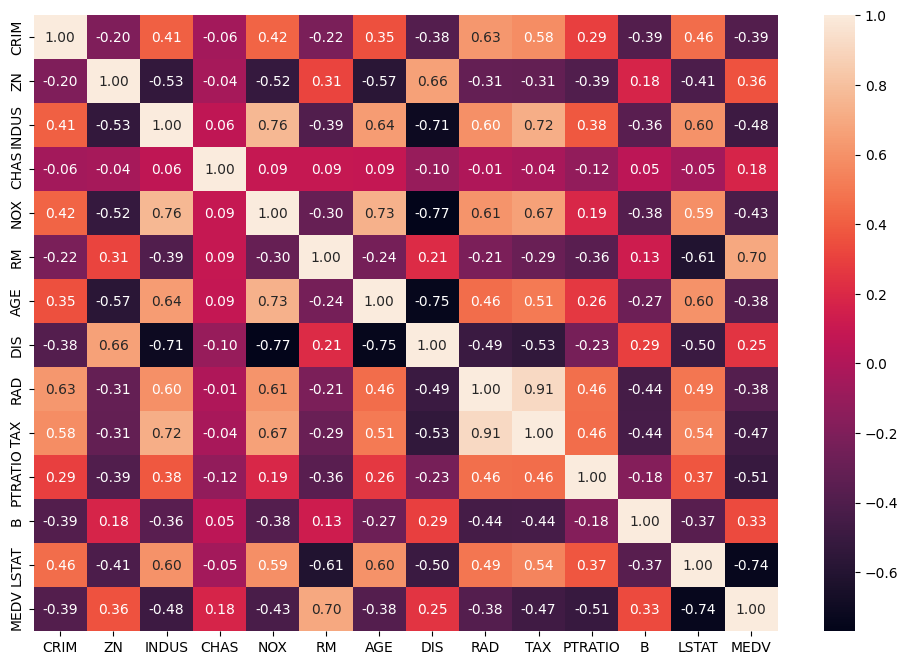

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(house_df.corr(),annot = True, fmt = ".2f")

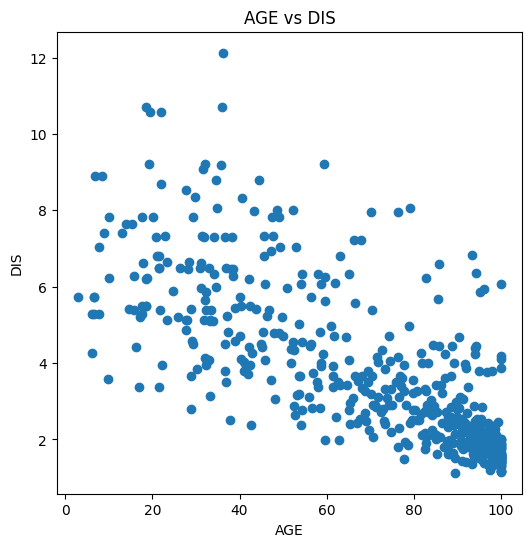

In [18]:
plt.figure(figsize = (6,6))
plt.scatter(house_df["AGE"],house_df["DIS"])
plt.title("AGE vs DIS")
plt.xlabel("AGE")
plt.ylabel("DIS");

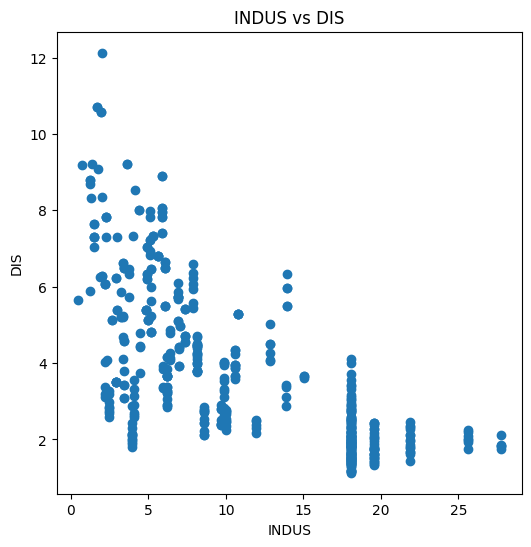

In [19]:
plt.figure(figsize = (6,6))
plt.scatter(house_df["INDUS"],house_df["DIS"])
plt.title("INDUS vs DIS")
plt.xlabel("INDUS")
plt.ylabel("DIS");

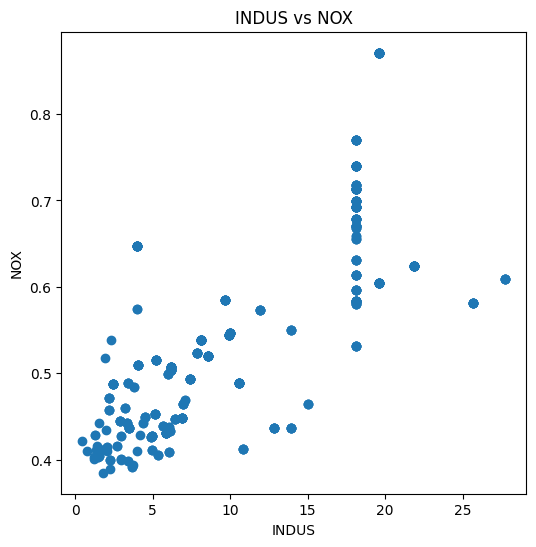

In [20]:
plt.figure(figsize = (6,6))
plt.scatter(house_df["INDUS"],house_df["NOX"])
plt.title("INDUS vs NOX")
plt.xlabel("INDUS")
plt.ylabel("NOX");

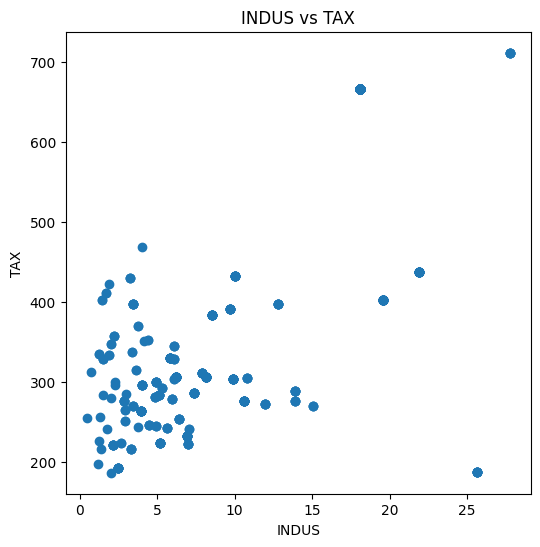

In [21]:
plt.figure(figsize = (6,6))
plt.scatter(house_df["INDUS"],house_df["TAX"])
plt.title("INDUS vs TAX")
plt.xlabel("INDUS")
plt.ylabel("TAX");

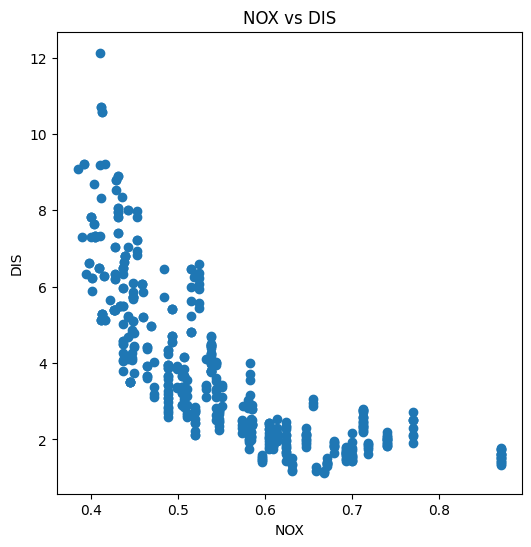

In [22]:
plt.figure(figsize = (6,6))
plt.scatter(house_df["NOX"],house_df["DIS"])
plt.title("NOX vs DIS")
plt.xlabel("NOX")
plt.ylabel("DIS");

### Splitting & Training

In [24]:
# Split the dataset into features and target
X = house_df.drop("MEDV",axis = 1)
y = house_df["MEDV"]

In [25]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

### Linear Regression

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
results = {}

In [69]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [70]:
model1.score(X_train,y_train)

0.7508856358979673

In [71]:
y_preds = model1.predict(X_test)
r2 = r2_score(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
r2,mae,mse

(0.6687594935356367, 3.189091965887801, 24.291119474973165)

In [72]:
results["Linear Regression"] = {"R2":r2,"MAE":mae,"MSE":mse}

### Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
model2.score(X_train,y_train)

0.9766868413555103

In [75]:
y_preds = model2.predict(X_test)
r2 = r2_score(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
results["Random Forest"] = {"R2":r2,"MAE":mae,"MSE":mse}
r2,mae,mse

(0.8821293025648318, 2.0664607843137253, 8.643904166666662)

### XGBoost

In [76]:
from xgboost import XGBRegressor

model3 = XGBRegressor()
model3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
model3.score(X_train,y_train)

0.9999969829984965

In [78]:
y_preds = model3.predict(X_test)
r2 = r2_score(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
results["XGBoost"] = {"R2":r2,"MAE":mae,"MSE":mse}
r2,mae,mse

(0.9057837838492537, 1.8908873698290656, 6.909231565384943)

In [79]:
results

{'Linear Regression': {'R2': 0.6687594935356367,
  'MAE': 3.189091965887801,
  'MSE': 24.291119474973165},
 'Random Forest': {'R2': 0.8821293025648318,
  'MAE': 2.0664607843137253,
  'MSE': 8.643904166666662},
 'XGBoost': {'R2': 0.9057837838492537,
  'MAE': 1.8908873698290656,
  'MSE': 6.909231565384943}}

In [81]:
df = pd.DataFrame.from_dict(results,orient = "index")

In [82]:
df

,R2,MAE,MSE
Linear Regression,0.668759,3.189092,24.291119
Random Forest,0.882129,2.066461,8.643904
XGBoost,0.905784,1.890887,6.909232


### **XGBoost** is the best model

In [90]:
import pickle
pickle.dump(model3,open("XGBoost.pkl","wb"))

In [91]:
from IPython.display import FileLink
FileLink('XGBoost.pkl')

/kaggle/working/XGBoost.pkl